In [89]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import seaborn as sns

In [90]:
X = pickle.load(open('X_scaled.p', 'rb'))
y = pickle.load(open('y.p', 'rb'))

In [91]:
train_size = 0.6
loc_test = int(X.shape[0]*train_size)
X_train, X_test = X.iloc[:loc_test], X.iloc[loc_test:]
y_train, y_test = y.iloc[:loc_test], y.iloc[loc_test:]

In [92]:
X_train.head()

,log_returns_t_minus_1,log_volumes_t_minus_1,log_counts_t_minus_1,log_returns_t_minus_10,log_volumes_t_minus_10,log_counts_t_minus_10,log_returns_t_minus_100,log_volumes_t_minus_100,log_counts_t_minus_100,_Spread,_Max_spread
timestamp,,,,,,,,,,,
1514764860,-0.001062,-9.741894e-07,-0.000003,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177,-0.000519,-0.333829
1514764920,-1.007810,-6.992360e-02,0.457159,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177,0.050954,-0.308071
1514764980,-1.935252,2.302382e+00,2.528186,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177,0.071543,-0.258881
1514765040,1.048278,-1.878305e+00,-1.586419,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177,-0.000519,-0.280319
1514765100,-2.932456,-4.716536e-03,-1.398939,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177,0.147923,-0.259546


In [93]:
# baseline model : linear regression

In [94]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
y_predict = model.predict(X_test)
r2_baseline = r2_score(y_test, y_predict)
r2_baseline

-0.1760862707512274

<AxesSubplot:xlabel='timestamp', ylabel='Target'>

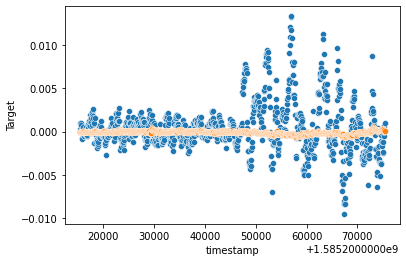

In [96]:
sns.scatterplot(x=y_test.iloc[:1000].index, y=y_test.iloc[:1000])
sns.scatterplot(x=y_test.iloc[:1000].index, y=y_predict[:1000])